**Run the following two cells before you begin.**

In [4]:
%autosave 10

Autosaving every 10 seconds


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

______________________________________________________________________
**First, import your data set and define the sigmoid function.**
<details>
    <summary>Hint:</summary>
    The definition of the sigmoid is $f(x) = \frac{1}{1 + e^{-X}}$.
</details>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_data.csv to cleaned_data.csv


In [6]:
# Import the data set
df = pd.read_csv('cleaned_data.csv')

In [7]:
# Create a train/test split
features_response = ['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']

In [8]:
corr = df[features_response].corr()
corr.iloc[0:5,0:5]

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1
LIMIT_BAL,1.000000,-0.232688,-0.111873,0.149157,-0.273396
EDUCATION,-0.232688,1.000000,-0.137097,0.179035,0.112653
MARRIAGE,-0.111873,-0.137097,1.000000,-0.412828,0.019759
AGE,0.149157,0.179035,-0.412828,1.000000,-0.044277
PAY_1,-0.273396,0.112653,0.019759,-0.044277,1.000000


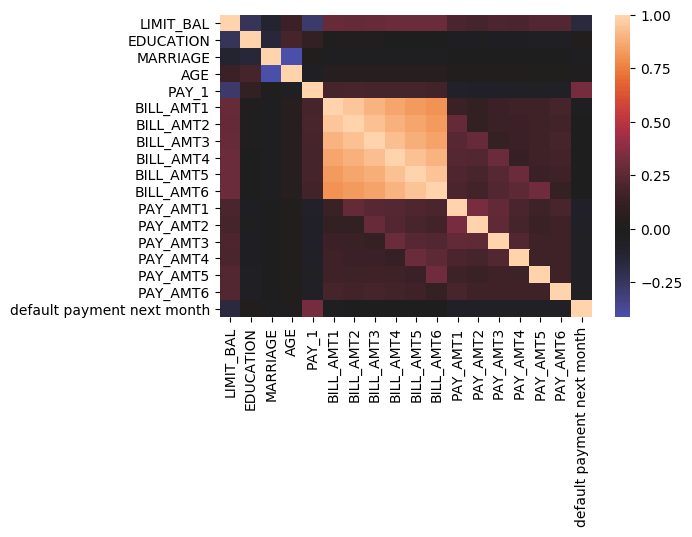

In [9]:
plt.figure(dpi=100)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            center=0)
plt.show()

In [10]:
X = df[features_response].iloc[:,:-1].values
y = df[features_response].iloc[:,-1].values
print(X.shape, y.shape)

(26664, 17) (26664,)


In [11]:
from sklearn.feature_selection import f_classif
[f_stat, f_p_value] = f_classif(X, y)

In [12]:
f_test_df = pd.DataFrame({'Feature':features_response[:-1],
                          'F statistic':f_stat,
                          'p value':f_p_value})
f_test_df.sort_values('p value')

,Feature,F statistic,p value
4,PAY_1,3156.672300,0.000000e+00
0,LIMIT_BAL,651.324071,5.838366e-142
11,PAY_AMT1,140.612679,2.358354e-32
12,PAY_AMT2,101.408321,8.256124e-24
13,PAY_AMT3,90.023873,2.542641e-21
15,PAY_AMT5,85.843295,2.090120e-20
16,PAY_AMT6,80.420784,3.219565e-19
14,PAY_AMT4,79.640021,4.774112e-19
1,EDUCATION,32.637768,1.122175e-08
2,MARRIAGE,18.078027,2.127555e-05


In [13]:
from sklearn.feature_selection import SelectPercentile
selector = SelectPercentile(f_classif, percentile=20)
selector.fit(X, y)

SelectPercentile(percentile=20,
                 score_func=<function f_classif at 0x000001B7EF2CBAE8>)

In [14]:
best_feature_ix = selector.get_support()
best_feature_ix

array([ True, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False])

In [15]:
features = features_response[:-1]

In [16]:
best_features = [features[counter] for counter in range(len(features))
                 if best_feature_ix[counter]]
best_features

['LIMIT_BAL', 'PAY_1', 'PAY_AMT1', 'PAY_AMT2']

In [17]:
overall_default_rate = df['default payment next month'].mean()
overall_default_rate

0.2217971797179718

In [18]:
group_by_pay_mean_y = df.groupby('PAY_1').agg({'default payment next month':np.mean})
group_by_pay_mean_y

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


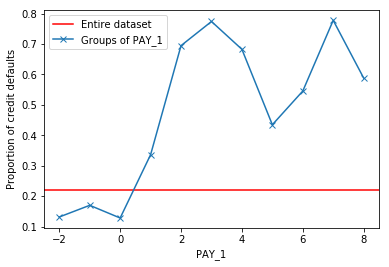

In [19]:
axes = plt.axes()
# plotting a red horizontal line on the axes
axes.axhline(overall_default_rate, color = "red")

group_by_pay_mean_y.plot(marker='x', legend=False, ax=axes)

axes.set_ylabel('Proportion of credit defaults')
axes.legend(['Entire dataset', 'Groups of PAY_1'])

plt.show()

Text(0.5, 1.0, 'Credit limits by response variable')

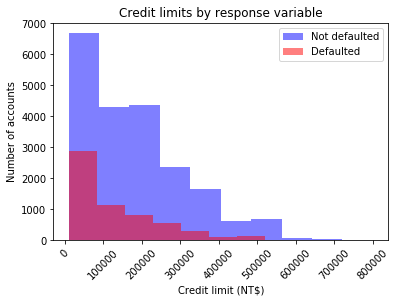

In [20]:
pos_mask = y == 1
neg_mask = y == 0
axes = plt.axes()
axes.hist(df.loc[neg_mask, 'LIMIT_BAL'], alpha=0.5, color='blue')
axes.hist(df.loc[pos_mask, 'LIMIT_BAL'], alpha=0.5, color='red')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Credit limit (NT$)')
axes.set_ylabel('Number of accounts')
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title('Credit limits by response variable')

In [21]:
bin_edges = list(range(0,850000,50000))
print(bin_edges[-1])

800000


Text(0.5, 1.0, 'Normalized distributions of credit limits by response variable')

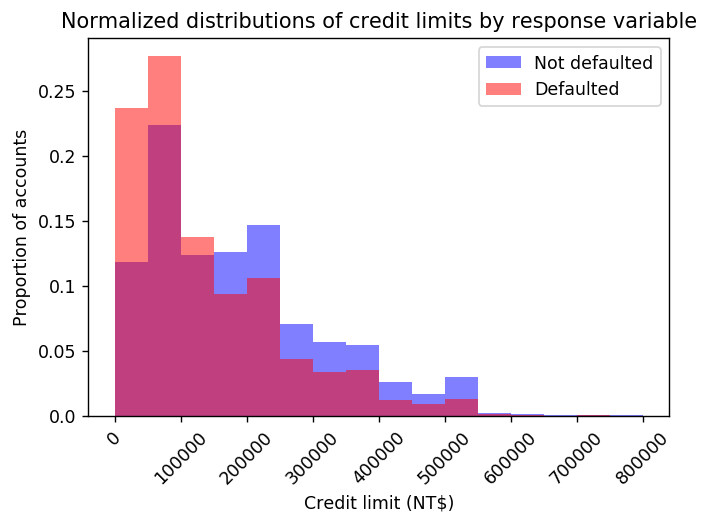

In [22]:
mpl.rcParams['figure.dpi'] = 125
axes = plt.axes()
axes.hist(df.loc[neg_mask, 'LIMIT_BAL'], bins=bin_edges, alpha=0.5, density=True, color='blue')
axes.hist(df.loc[pos_mask, 'LIMIT_BAL'], bins=bin_edges, alpha=0.5, density=True, color='red')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Credit limit (NT$)')
axes.set_ylabel('Proportion of accounts')
y_ticks = axes.get_yticks()
axes.set_yticklabels(np.round(y_ticks*50000,2))
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title('Normalized distributions of credit limits by response variable')

In [23]:
X_exp = np.linspace(-4,4,81)
print(X_exp[:5])
print(X_exp[-5:])
Y_exp = np.exp(X_exp)
print(Y_exp[:5])

[-4.  -3.9 -3.8 -3.7 -3.6]
[3.6 3.7 3.8 3.9 4. ]
[0.01831564 0.02024191 0.02237077 0.02472353 0.02732372]


Text(0.5, 1.0, 'Plot of $e^X$')

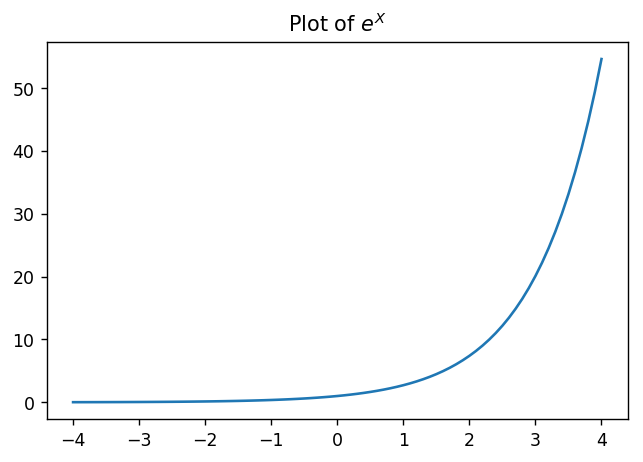

In [24]:
plt.plot(X_exp, Y_exp)
plt.title('Plot of $e^X$')

Text(0.5, 1.0, 'Plot of $e^{-X}$')

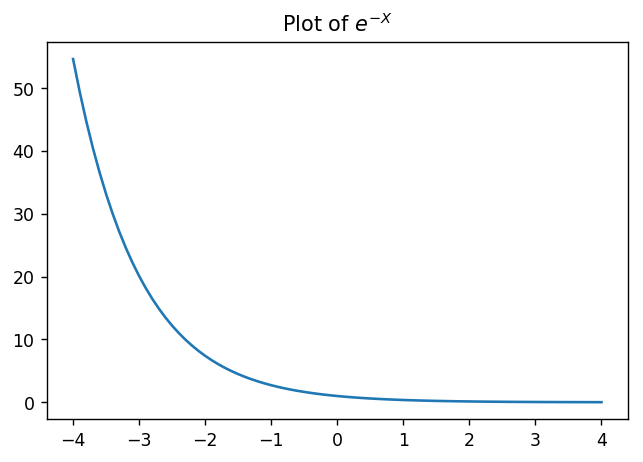

In [25]:
Y_exp = np.exp(-X_exp)
plt.plot(X_exp, Y_exp)
plt.title('Plot of $e^{-X}$')

In [26]:
def sigmoid(X):
    Y = 1 / (1 + np.exp(-X))
    return Y

Text(0.5, 1.0, 'The sigmoid function')

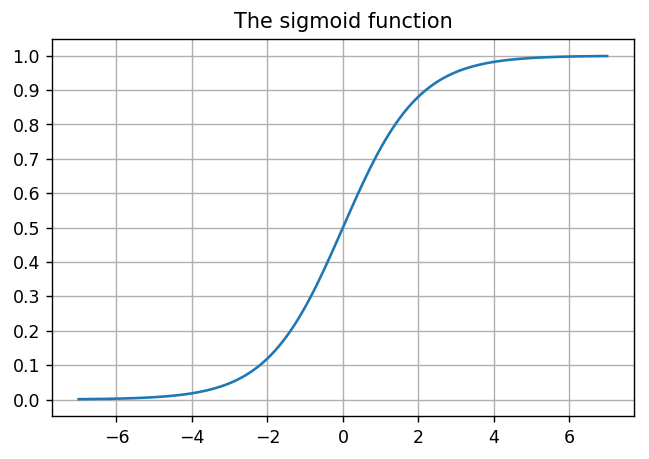

In [27]:
X_sig = np.linspace(-7,7,141)
Y_sig = sigmoid(X_sig)
plt.plot(X_sig,Y_sig)
plt.yticks(np.linspace(0,1,11))
plt.grid()
plt.title('The sigmoid function')

In [28]:
group_by_pay_mean_y

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


In [29]:
p = group_by_pay_mean_y['default payment next month'].values

In [30]:
q = 1-p
print(p)
print(q)

[0.13166397 0.17000198 0.12829525 0.33639988 0.69470143 0.7739726
 0.68253968 0.43478261 0.54545455 0.77777778 0.58823529]
[0.86833603 0.82999802 0.87170475 0.66360012 0.30529857 0.2260274
 0.31746032 0.56521739 0.45454545 0.22222222 0.41176471]


In [31]:
odds_ratio = p/q
log_odds = np.log(odds_ratio)
log_odds

array([-1.88632574, -1.58561322, -1.91611649, -0.67937918,  0.82219194,
        1.23088026,  0.76546784, -0.26236426,  0.18232156,  1.25276297,
        0.35667494])

In [32]:
group_by_pay_mean_y.index

Int64Index([-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64', name='PAY_1')

Text(0.5, 0, 'Values of PAY_1')

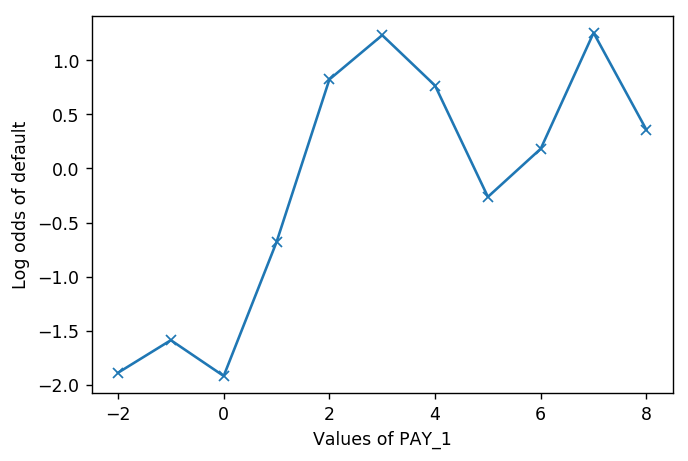

In [33]:
plt.plot(group_by_pay_mean_y.index, log_odds, '-x')
plt.ylabel('Log odds of default')
plt.xlabel('Values of PAY_1')

In [34]:
np.random.seed(seed=6)
X_1_pos = np.random.uniform(low=1, high=7, size=(20,1))
print(X_1_pos[0:3])
X_1_neg = np.random.uniform(low=3, high=10, size=(20,1))
print(X_1_neg[0:3])
X_2_pos = np.random.uniform(low=1, high=7, size=(20,1))
print(X_1_pos[0:3])
X_2_neg = np.random.uniform(low=3, high=10, size=(20,1))
print(X_1_neg[0:3])

[[6.35716091]
 [2.99187883]
 [5.92737474]]
[[3.38132155]
 [8.03046066]
 [8.61519394]]
[[6.35716091]
 [2.99187883]
 [5.92737474]]
[[3.38132155]
 [8.03046066]
 [8.61519394]]


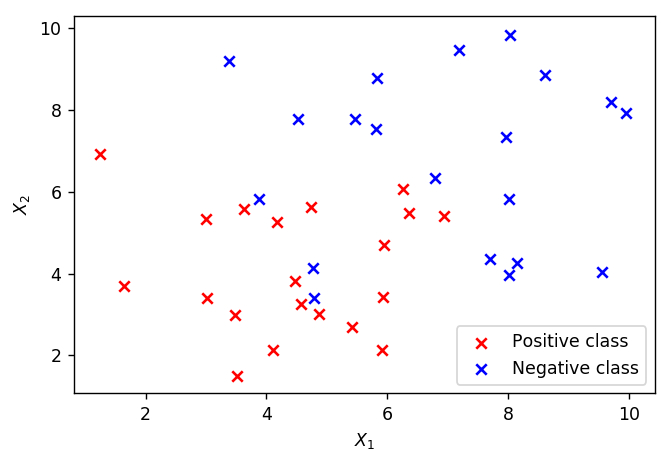

In [35]:
plt.scatter(X_1_pos, X_2_pos, color='red', marker='x')
plt.scatter(X_1_neg, X_2_neg, color='blue', marker='x')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(['Positive class', 'Negative class'])

In [36]:
X = np.block([[X_1_pos, X_2_pos], [X_1_neg, X_2_neg]])
print(X.shape)
print(X[0:3])


(40, 2)
[[6.35716091 5.4790643 ]
 [2.99187883 5.3444234 ]
 [5.92737474 3.43664678]]


In [37]:
y = np.vstack((np.ones((20,1)), np.zeros((20,1)))).reshape(40,)
print(y[0:5])
print(y[-5:])

[1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0.]


**Now, create a train/test split (80/20) with `PAY_1` and `LIMIT_BAL` as features and `default payment next month` as values. Use a random state of 24.**

In [38]:
from sklearn.model_selection import train_test_split
X = df[['PAY_1', 'LIMIT_BAL']]
y = df['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((21331, 2), (21331,), (5333, 2), (5333,))

______________________________________________________________________
**Next, import LogisticRegression, with the default options, but set the solver to `'liblinear'`.**

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
lr_model = LogisticRegression(solver = 'liblinear')

______________________________________________________________________
**Now, train on the training data and obtain predicted classes, as well as class probabilities, using the testing data.**

In [41]:
# Fit the logistic regression model on training data
lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
# Make predictions using `.predict()
y_pred = lr_model.predict(X_test)
y_pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [43]:
# Find class probabilities using `.predict_proba()`
y_proba = lr_model.predict_proba(X_test)
y_proba

array([[0.74826924, 0.25173076],
       [0.584297  , 0.415703  ],
       [0.79604453, 0.20395547],
       ...,
       [0.584297  , 0.415703  ],
       [0.82721498, 0.17278502],
       [0.66393435, 0.33606565]])

______________________________________________________________________
**Then, pull out the coefficients and intercept from the trained model and manually calculate predicted probabilities. You'll need to add a column of 1s to your features, to multiply by the intercept.**

In [44]:
# Add column of 1s to features


In [45]:
# Get coefficients and intercepts from trained model
coef = lr_model.coef_
intercept = lr_model.intercept_

In [46]:
# Manually calculate predicted probabilities
manual_y_proba = sigmoid((coef * X_test.values) + intercept)
manual_y_proba

array([[0.5       , 0.25173076],
       [0.5       , 0.415703  ],
       [0.5       , 0.20395547],
       ...,
       [0.5       , 0.415703  ],
       [0.5       , 0.17278502],
       [0.5       , 0.33606565]])

______________________________________________________________________
**Next, using a threshold of `0.5`, manually calculate predicted classes. Compare this to the class predictions output by scikit-learn.**

In [47]:
# Manually calculate predicted classes
threshold = 0.5
manual_y_pred = []

for i in manual_y_proba[:, 1]:
    if i >= threshold:
        manual_y_pred.append(1)
    else:
        manual_y_pred.append(0)

manual_y_pred = np.asarray(manual_y_pred)        

manual_y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [48]:
# Compare to scikit-learn's predicted classes
pos = y_pred == 1
neg = y_pred == 0
manual_pos = manual_y_pred == 1
manual_neg = manual_y_pred == 0
print(f"Positives = {sum(pos)} and Negatives = {sum(neg)} are predicted classes.")
print(f"Positives = {sum(manual_pos)} and Negatives = {sum(manual_neg)} are maually predicted classes.")

Positives = 0 and Negatives = 5333 are predicted classes.
Positives = 0 and Negatives = 5333 are maually predicted classes.


______________________________________________________________________
**Finally, calculate ROC AUC using both scikit-learn's predicted probabilities, and your manually predicted probabilities, and compare.**

In [49]:
# Use scikit-learn's predicted probabilities to calculate ROC AUC
from sklearn import metrics

print(f"ROC AUC Score for predicted probabilities: {metrics.roc_auc_score(y_test, y_proba[:, 1])}")

ROC AUC Score for predicted probabilities: 0.627207450280691


In [50]:
# Use manually calculated predicted probabilities to calculate ROC AUC
print(f"ROC AUC Score for manually predicted probabilities: {metrics.roc_auc_score(y_test, manual_y_proba[:, 1])}")

ROC AUC Score for manually predicted probabilities: 0.6201990844642832
